# Integración de Datasets

Realizado por:
- Paula Monge
- Emmanuel Zúñiga

Trabajo de Invetigación del Curso:
- Investigación en Ciencias de la Computación

Tema de Investigación:
- Aprendizaje Automático en la clasificación de Sentimientos en Twitter: Comparación de los Algoritmos de LSTM Bidireccional, BERT y Naïve Bayes.

El presente notebook implementa una integración entre algunos datasets que podrían ser útiles. Para ello se hace una transformación de los datasets seleccionados al formato .csv, y la transformación a las clases respectivos: positive, negative, litigious, uncertainty

## Carga de librerias 📚

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Carga de los datasets

In [ ]:
from google.colab import drive

# Se carga la libreria drive de google para cargar los archivos almacenados en drive
drive.mount("/content/gdrive")

# El dataset en cuestión contiene datos sobre tweets en diferentes idiomas, pero nos interesa utilizar solo
# los que se encuentran en español.
dataset_1 = pd.read_csv('/content/gdrive/My Drive/tweets.csv').query('Language == "es"')

# Los demás datasets han sido procesados para adaptar el formato del dataset original

dataset_2 = pd.read_csv('/content/gdrive/My Drive/tass_dataset_1.csv')

dataset_3 = pd.read_csv('/content/gdrive/My Drive/tass_dataset_2.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Verificación de los datasets 📅

In [ ]:
# Primer dataset 
dataset_1.head(10)

,Text,Language,Label
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
36,"@alitomorenoc No mames, ya mejor lárgate del P...",es,litigious
173,"Good MEWning ♥️🐼♥️\nUn nuevo amanecer,un nuevo...",es,positive
330,criminal por robarme el corazón https://t.co/O...,es,litigious
455,@isiupdates Pantera \n#IsiVives #IsiVivesCHILE...,es,positive
556,Os quiero recordar y hacer saber a los que aún...,es,positive
572,@Orlando71156528 Y sin embargo un criminal de ...,es,litigious
702,@Fergus0055 No sería porque los tóxicos de xbo...,es,positive
812,@loonalendaskk ahh q legal,es,litigious
823,@JesusRCuevas @lopezobrador_ Pues no lamenta l...,es,litigious


In [ ]:
dataset_2.head(10)

,Unnamed: 0,Text,Label
0,0,"Salgo de #VeoTV , que día más largoooooo...",uncertainty
1,1,@PauladeLasHeras No te libraras de ayudar me/n...,litigious
2,2,@marodriguezb Gracias MAR,litigious
3,3,"Off pensando en el regalito Sinde, la que se v...",positive
4,4,Conozco a alguien q es adicto al drama! Ja ja ...,positive
5,5,"RT @FabHddzC: Si amas a alguien, déjalo libre....",negative
6,6,Toca @crackoviadeTV3 . Grabación dl especial N...,negative
7,7,Hoy asisitiré en Madrid a un seminario sobre l...,negative
8,8,Buen día todos! Lo primero mandar un abrazo gr...,positive
9,9,Desde el escaño. Todo listo para empezar #endi...,uncertainty


In [ ]:
dataset_3.head(10)

,Unnamed: 0,Text,Label
0,0,-Me caes muy bien -Tienes que jugar más partid...,uncertainty
1,1,@myendlesshazza a. que puto mal escribob. me s...,negative
2,2,@estherct209 jajajaja la tuya y la d mucha gen...,negative
3,3,Quiero mogollón a @AlbaBenito99 pero sobretodo...,positive
4,4,Vale he visto la tia bebiendose su regla y me ...,negative
5,5,@Yulian_Poe @guillermoterry1 Ah. mucho más por...,positive
6,6,Se ha terminado #Rio2016 Lamentablemente no ar...,negative
7,7,11. siiii fue super gracioso teniamos que habe...,positive
8,8,@toNi_end seria mejor que dejasen de emitir es...,negative
9,9,"@jonoro96 te mandaria a comprarte un burro, pe...",negative


## Integración de los datasets 🔗

In [ ]:
dataset_1 = dataset_1.drop('Language', axis = 1)

In [ ]:
dataset_1.head(10)

,Text,Label
1,#BadBunny: Como dos gotas de agua: Joven se di...,negative
36,"@alitomorenoc No mames, ya mejor lárgate del P...",litigious
173,"Good MEWning ♥️🐼♥️\nUn nuevo amanecer,un nuevo...",positive
330,criminal por robarme el corazón https://t.co/O...,litigious
455,@isiupdates Pantera \n#IsiVives #IsiVivesCHILE...,positive
556,Os quiero recordar y hacer saber a los que aún...,positive
572,@Orlando71156528 Y sin embargo un criminal de ...,litigious
702,@Fergus0055 No sería porque los tóxicos de xbo...,positive
812,@loonalendaskk ahh q legal,litigious
823,@JesusRCuevas @lopezobrador_ Pues no lamenta l...,litigious


In [ ]:
dataset_2 = dataset_2.drop('Unnamed: 0', axis = 1)

In [ ]:
dataset_2.head(10)

,Text,Label
0,"Salgo de #VeoTV , que día más largoooooo...",uncertainty
1,@PauladeLasHeras No te libraras de ayudar me/n...,litigious
2,@marodriguezb Gracias MAR,litigious
3,"Off pensando en el regalito Sinde, la que se v...",positive
4,Conozco a alguien q es adicto al drama! Ja ja ...,positive
5,"RT @FabHddzC: Si amas a alguien, déjalo libre....",negative
6,Toca @crackoviadeTV3 . Grabación dl especial N...,negative
7,Hoy asisitiré en Madrid a un seminario sobre l...,negative
8,Buen día todos! Lo primero mandar un abrazo gr...,positive
9,Desde el escaño. Todo listo para empezar #endi...,uncertainty


In [ ]:
dataset_3 = dataset_3.drop('Unnamed: 0', axis = 1)

In [ ]:
## Concatenación de los datasets
concatenated_df = pd.concat([dataset_1, dataset_2, dataset_3])

In [ ]:
concatenated_df.shape

(19560, 2)

## Análisis Exploratorio 📊

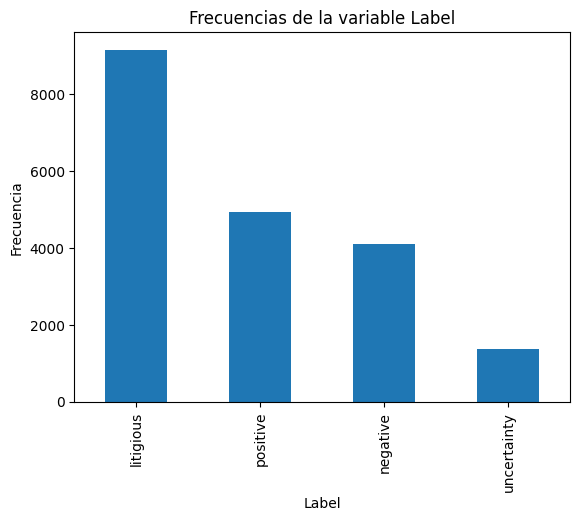

In [ ]:
# Generamos un histograma de la variable categórica 'Label'
# Contar las ocurrencias de cada valor en la columna 'Categoria'
frecuencias = concatenated_df['Label'].value_counts()

# Generar el histograma de frecuencias
frecuencias.plot(kind='bar')

# Personalizar el gráfico
plt.title('Frecuencias de la variable Label')
plt.xlabel('Label')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [ ]:
# Filtramos el dataset para seleccionar los registros que cumplen el valor en la columna en cuestión
data_filtrado = concatenated_df[concatenated_df['Label'] == 'litigious']

# Seleccionamos aleatoriamente 4000 registros de los que cumplen ese valor
registros_borrar = data_filtrado.sample(n=4000)

# Borramos los registros seleccionados
copia = concatenated_df
dataset = concatenated_df.drop(registros_borrar.index)

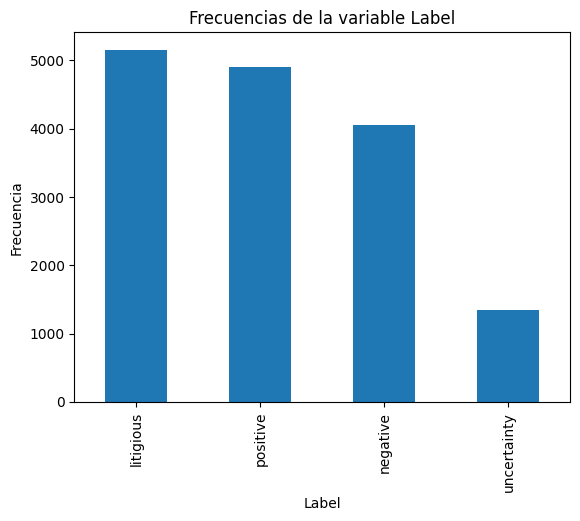

In [ ]:
# Generamos un histograma de la variable categórica 'Label'
# Contar las ocurrencias de cada valor en la columna 'Categoria'
frecuencias = dataset['Label'].value_counts()

# Generar el histograma de frecuencias
frecuencias.plot(kind='bar')

# Personalizar el gráfico
plt.title('Frecuencias de la variable Label')
plt.xlabel('Label')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

## Guardado del Dataset ✍

In [ ]:
# Montar el drive
drive.mount('/content/drive')

# Guardar el dataset en un archivo CSV en tu drive
concatenated_df.to_csv('/content/drive/My Drive/integrated_dataset.csv', index=True)

Mounted at /content/drive
